In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
data = pd.read_excel('电子产品销售分析表.xlsx',sheet_name=1)
data.head()

,Column1,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local
0,0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2268105426648171300,electronics.tablet,samsung,162.01,1515915625441994000,24,女,海南
1,1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2268105426648171300,electronics.tablet,samsung,162.01,1515915625441994000,24,女,海南
2,2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2268105430162997500,electronics.audio.headphone,huawei,77.52,1515915625447879400,38,女,北京
3,3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2268105430162997500,electronics.audio.headphone,huawei,77.52,1515915625447879400,38,女,北京
4,4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2268105471367840000,NaN,karcher,217.57,1515915625443148000,32,女,广东


In [3]:
# 查看数据的基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564169 entries, 0 to 564168
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Column1        564169 non-null  int64  
 1   event_time     564169 non-null  object 
 2   order_id       564169 non-null  int64  
 3   product_id     564169 non-null  int64  
 4   category_id    564169 non-null  int64  
 5   category_code  434799 non-null  object 
 6   brand          536945 non-null  object 
 7   price          564169 non-null  float64
 8   user_id        564169 non-null  int64  
 9   age            564169 non-null  int64  
 10  sex            564169 non-null  object 
 11  local          564169 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 51.7+ MB


In [4]:
data.describe(include='all')

,Column1,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local
count,5.641690e+05,564169,5.641690e+05,5.641690e+05,5.641690e+05,434799,536945,564169.000000,5.641690e+05,564169.000000,564169,564169
unique,NaN,389835,NaN,NaN,NaN,123,868,NaN,NaN,NaN,2,11
top,NaN,1970-01-01 00:33:40 UTC,NaN,NaN,NaN,electronics.smartphone,samsung,NaN,NaN,NaN,男,广东
freq,NaN,1307,NaN,NaN,NaN,102697,96239,NaN,NaN,NaN,284421,122909
mean,1.792965e+06,NaN,2.370552e+18,1.695711e+18,2.272919e+18,NaN,NaN,208.269324,1.515916e+18,33.184388,NaN,NaN
std,7.745342e+05,NaN,2.025138e+16,3.290688e+17,2.158282e+16,NaN,NaN,304.559875,2.377083e+07,10.122088,NaN,NaN
min,0.000000e+00,NaN,2.294360e+18,1.515966e+18,2.268105e+18,NaN,NaN,0.000000,1.515916e+18,16.000000,NaN,NaN
25%,1.658965e+06,NaN,2.353294e+18,1.515966e+18,2.268105e+18,NaN,NaN,23.130000,1.515916e+18,24.000000,NaN,NaN
50%,1.861597e+06,NaN,2.376886e+18,1.515966e+18,2.268105e+18,NaN,NaN,87.940000,1.515916e+18,33.000000,NaN,NaN
75%,2.473370e+06,NaN,2.388441e+18,1.515966e+18,2.268105e+18,NaN,NaN,277.750000,1.515916e+18,42.000000,NaN,NaN


In [5]:
# 修改数据类型
data['order_id'] = data['order_id'].astype('str')
data['product_id'] = data['product_id'].astype('str')
data['category_id'] = data['category_id'].astype('str')
data['user_id'] = data['user_id'].astype('str')
data = data.drop('Column1',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564169 entries, 0 to 564168
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     564169 non-null  object 
 1   order_id       564169 non-null  object 
 2   product_id     564169 non-null  object 
 3   category_id    564169 non-null  object 
 4   category_code  434799 non-null  object 
 5   brand          536945 non-null  object 
 6   price          564169 non-null  float64
 7   user_id        564169 non-null  object 
 8   age            564169 non-null  int64  
 9   sex            564169 non-null  object 
 10  local          564169 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 47.3+ MB


In [6]:
data.describe(include='all')

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local
count,564169,564169,564169,564169,434799,536945,564169.000000,564169,564169.000000,564169,564169
unique,389835,400538,20964,829,123,868,NaN,93823,NaN,2,11
top,1970-01-01 00:33:40 UTC,2388440981134689974,1515966223517846928,2268105428166508800,electronics.smartphone,samsung,NaN,1515915625512423000,NaN,男,广东
freq,1307,47,2759,101182,102697,96239,NaN,1092,NaN,284421,122909
mean,NaN,NaN,NaN,NaN,NaN,NaN,208.269324,NaN,33.184388,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,304.559875,NaN,10.122088,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,16.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,23.130000,NaN,24.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,87.940000,NaN,33.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,277.750000,NaN,42.000000,NaN,NaN


In [7]:
data

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2268105426648171300,electronics.tablet,samsung,162.01,1515915625441994000,24,女,海南
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2268105426648171300,electronics.tablet,samsung,162.01,1515915625441994000,24,女,海南
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2268105430162997500,electronics.audio.headphone,huawei,77.52,1515915625447879400,38,女,北京
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2268105430162997500,electronics.audio.headphone,huawei,77.52,1515915625447879400,38,女,北京
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2268105471367840000,NaN,karcher,217.57,1515915625443148000,32,女,广东
...,...,...,...,...,...,...,...,...,...,...,...
564164,2020-11-21 10:10:01 UTC,2388440981134693942,1515966223526602848,2268105428166508800,electronics.smartphone,oppo,138.87,1515915625514888700,21,男,上海
564165,2020-11-21 10:10:13 UTC,2388440981134693943,1515966223509089282,2268105428166508800,electronics.smartphone,apple,418.96,1515915625514891300,21,女,北京
564166,2020-11-21 10:10:30 UTC,2388440981134693944,1515966223509089917,2268105402447037200,appliances.personal.scales,vitek,12.48,1515915625514834200,19,女,上海
564167,2020-11-21 10:10:30 UTC,2388440981134693944,2273948184839454837,2268105440371934000,NaN,moulinex,41.64,1515915625514834200,19,女,上海


# 数据清洗

In [8]:
data['price'].describe() # 价格为0 没有意义 删除
data = data[data['price']!=0]

In [9]:
user_check = data.groupby('user_id').agg(
    age_unique=('age', 'nunique'),
    gender_unique=('sex', 'nunique'),
    local_unique = ('local','nunique')
)
user_nunique = user_check[(user_check['age_unique']==1) & (user_check['gender_unique']==1) &(user_check['local_unique']==1) ].index
data = data[data['user_id'].isin(user_nunique)]
# data['event_time'] = data['event_time'].str[0:10]
data['event_time'] = pd.to_datetime(data['event_time'])
data

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local
0,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2268105426648171300,electronics.tablet,samsung,162.01,1515915625441994000,24,女,海南
1,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2268105426648171300,electronics.tablet,samsung,162.01,1515915625441994000,24,女,海南
2,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2268105430162997500,electronics.audio.headphone,huawei,77.52,1515915625447879400,38,女,北京
3,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2268105430162997500,electronics.audio.headphone,huawei,77.52,1515915625447879400,38,女,北京
4,2020-04-24 19:16:21+00:00,2294584263154074236,2273948316817424439,2268105471367840000,NaN,karcher,217.57,1515915625443148000,32,女,广东
...,...,...,...,...,...,...,...,...,...,...,...
564164,2020-11-21 10:10:01+00:00,2388440981134693942,1515966223526602848,2268105428166508800,electronics.smartphone,oppo,138.87,1515915625514888700,21,男,上海
564165,2020-11-21 10:10:13+00:00,2388440981134693943,1515966223509089282,2268105428166508800,electronics.smartphone,apple,418.96,1515915625514891300,21,女,北京
564166,2020-11-21 10:10:30+00:00,2388440981134693944,1515966223509089917,2268105402447037200,appliances.personal.scales,vitek,12.48,1515915625514834200,19,女,上海
564167,2020-11-21 10:10:30+00:00,2388440981134693944,2273948184839454837,2268105440371934000,NaN,moulinex,41.64,1515915625514834200,19,女,上海


In [10]:
data['sex'].value_counts()

sex
女    246352
男    244958
Name: count, dtype: int64

In [11]:
data['age'].value_counts()
data['year'] = data['event_time'].dt.year
data['quarter'] = data['event_time'].dt.quarter
data['month'] = data['event_time'].dt.month
data['weekday'] = data['event_time'].dt.day_name(locale='chinese')
data['hour'] = data['event_time'].dt.hour
data['year'].value_counts()
data = data[data['year']!=1970]
data['hour'].value_counts()

hour
10    45843
9     45768
8     44338
7     43007
11    42315
6     40764
12    37045
5     34627
13    29866
4     23170
14    19946
15    15382
16    12035
3     11559
17     9928
18     6825
2      6158
19     4417
1      3913
0      2981
20     2972
23     2696
22     2356
21     2112
Name: count, dtype: int64

In [12]:
data.info()
data['category_code'].fillna('no_code',inplace=True)
data['brand'].fillna('no_brand',inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 490023 entries, 0 to 564168
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   event_time     490023 non-null  datetime64[ns, UTC]
 1   order_id       490023 non-null  object             
 2   product_id     490023 non-null  object             
 3   category_id    490023 non-null  object             
 4   category_code  378618 non-null  object             
 5   brand          466515 non-null  object             
 6   price          490023 non-null  float64            
 7   user_id        490023 non-null  object             
 8   age            490023 non-null  int64              
 9   sex            490023 non-null  object             
 10  local          490023 non-null  object             
 11  year           490023 non-null  int32              
 12  quarter        490023 non-null  int32              
 13  month          490023 non-null  in

C:\Users\21369\AppData\Local\Temp\ipykernel_4544\848794324.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['category_code'].fillna('no_code',inplace=True)
C:\Users\21369\AppData\Local\Temp\ipykernel_4544\848794324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['category_code'].fillna('no_code',inplace=True)
C:\Users\21369\Ap

In [13]:
data['age'] = pd.cut(data['age'],[10,20,30,40,50],labels=['10~20','20~30','30~40','40~50'])
data

C:\Users\21369\AppData\Local\Temp\ipykernel_4544\2176506389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = pd.cut(data['age'],[10,20,30,40,50],labels=['10~20','20~30','30~40','40~50'])


,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,year,quarter,month,weekday,hour
0,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2268105426648171300,electronics.tablet,samsung,162.01,1515915625441994000,20~30,女,海南,2020,2,4,星期五,11
1,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2268105426648171300,electronics.tablet,samsung,162.01,1515915625441994000,20~30,女,海南,2020,2,4,星期五,11
2,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2268105430162997500,electronics.audio.headphone,huawei,77.52,1515915625447879400,30~40,女,北京,2020,2,4,星期五,14
3,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2268105430162997500,electronics.audio.headphone,huawei,77.52,1515915625447879400,30~40,女,北京,2020,2,4,星期五,14
4,2020-04-24 19:16:21+00:00,2294584263154074236,2273948316817424439,2268105471367840000,no_code,karcher,217.57,1515915625443148000,30~40,女,广东,2020,2,4,星期五,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564164,2020-11-21 10:10:01+00:00,2388440981134693942,1515966223526602848,2268105428166508800,electronics.smartphone,oppo,138.87,1515915625514888700,20~30,男,上海,2020,4,11,星期六,10
564165,2020-11-21 10:10:13+00:00,2388440981134693943,1515966223509089282,2268105428166508800,electronics.smartphone,apple,418.96,1515915625514891300,20~30,女,北京,2020,4,11,星期六,10
564166,2020-11-21 10:10:30+00:00,2388440981134693944,1515966223509089917,2268105402447037200,appliances.personal.scales,vitek,12.48,1515915625514834200,10~20,女,上海,2020,4,11,星期六,10
564167,2020-11-21 10:10:30+00:00,2388440981134693944,2273948184839454837,2268105440371934000,no_code,moulinex,41.64,1515915625514834200,10~20,女,上海,2020,4,11,星期六,10


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 490023 entries, 0 to 564168
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   event_time     490023 non-null  datetime64[ns, UTC]
 1   order_id       490023 non-null  object             
 2   product_id     490023 non-null  object             
 3   category_id    490023 non-null  object             
 4   category_code  490023 non-null  object             
 5   brand          490023 non-null  object             
 6   price          490023 non-null  float64            
 7   user_id        490023 non-null  object             
 8   age            490023 non-null  category           
 9   sex            490023 non-null  object             
 10  local          490023 non-null  object             
 11  year           490023 non-null  int32              
 12  quarter        490023 non-null  int32              
 13  month          490023 non-null  in

# 数据分析

随机颜色函数

In [15]:
def random_color(n):
    colors = []
    for i in range(n):
        random_color = tuple(np.random.rand(3))
        colors.append(random_color)
    return colors

In [16]:
# 从用户的不同维度去分析 年龄 地区 性别  分析 订单数量 消费金额 客单价
def f(df,x,x_text):
    plt.figure(figsize=(10,8))
    df1 = df.groupby(x)['user_id'].nunique()
    df1.plot(kind='pie',autopct='%.2f%%')
    plt.legend()
    plt.title(f'{x_text}占比图')
    plt.figure(figsize=(20,15))
    plt.subplot(3,1,1)
    # 订单数量
    df2 = df.groupby(x)['order_id'].nunique().sort_values(ascending=False)
    ncolors = random_color(len(df2))
    ax = df2.plot(kind='bar',color = ncolors,rot=0)
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height()}',                # 显示数值
            (p.get_x() + p.get_width() / 2, p.get_height()),  # 标签位置
            ha='center', va='bottom', fontsize=10  # 对齐方式
        )
    plt.ylabel('订单数量')
    plt.tight_layout()
    # 消费金额
    plt.subplot(3,1,2)
    df3 = df.groupby(x)['price'].sum().sort_values(ascending=False)
    ncolors = random_color(len(df3))
    ax = df3.plot(kind='bar',color = ncolors,rot=0)
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height()}',                # 显示数值
            (p.get_x() + p.get_width() / 2, p.get_height()),  # 标签位置
            ha='center', va='bottom', fontsize=10  # 对齐方式
        )
    plt.ylabel('消费金额')
    plt.tight_layout()
    # 客单价
    plt.subplot(3,1,3)
    df4 = (df.groupby(x)['price'].sum()/df.groupby(x)['order_id'].nunique()).sort_values(ascending=False)
    ncolors = random_color(len(df4))
    ax = df4.plot(kind='bar',color = ncolors,rot=0)
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height()}',                # 显示数值
            (p.get_x() + p.get_width() / 2, p.get_height()),  # 标签位置
            ha='center', va='bottom', fontsize=10  # 对齐方式
        )
    plt.ylabel('客单价')
    plt.legend()
    plt.tight_layout()

C:\Users\21369\AppData\Local\Temp\ipykernel_4544\4217753806.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 = df.groupby(x)['user_id'].nunique()
C:\Users\21369\AppData\Local\Temp\ipykernel_4544\4217753806.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = df.groupby(x)['order_id'].nunique().sort_values(ascending=False)
C:\Users\21369\AppData\Local\Temp\ipykernel_4544\4217753806.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default an

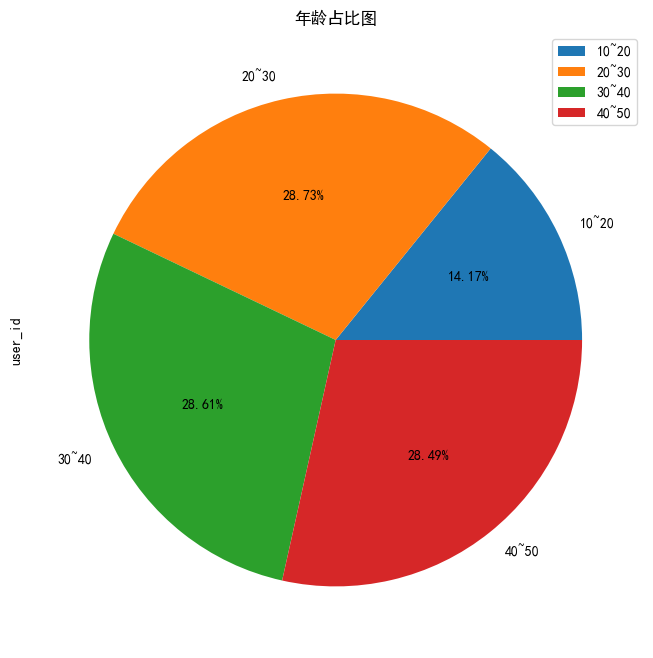

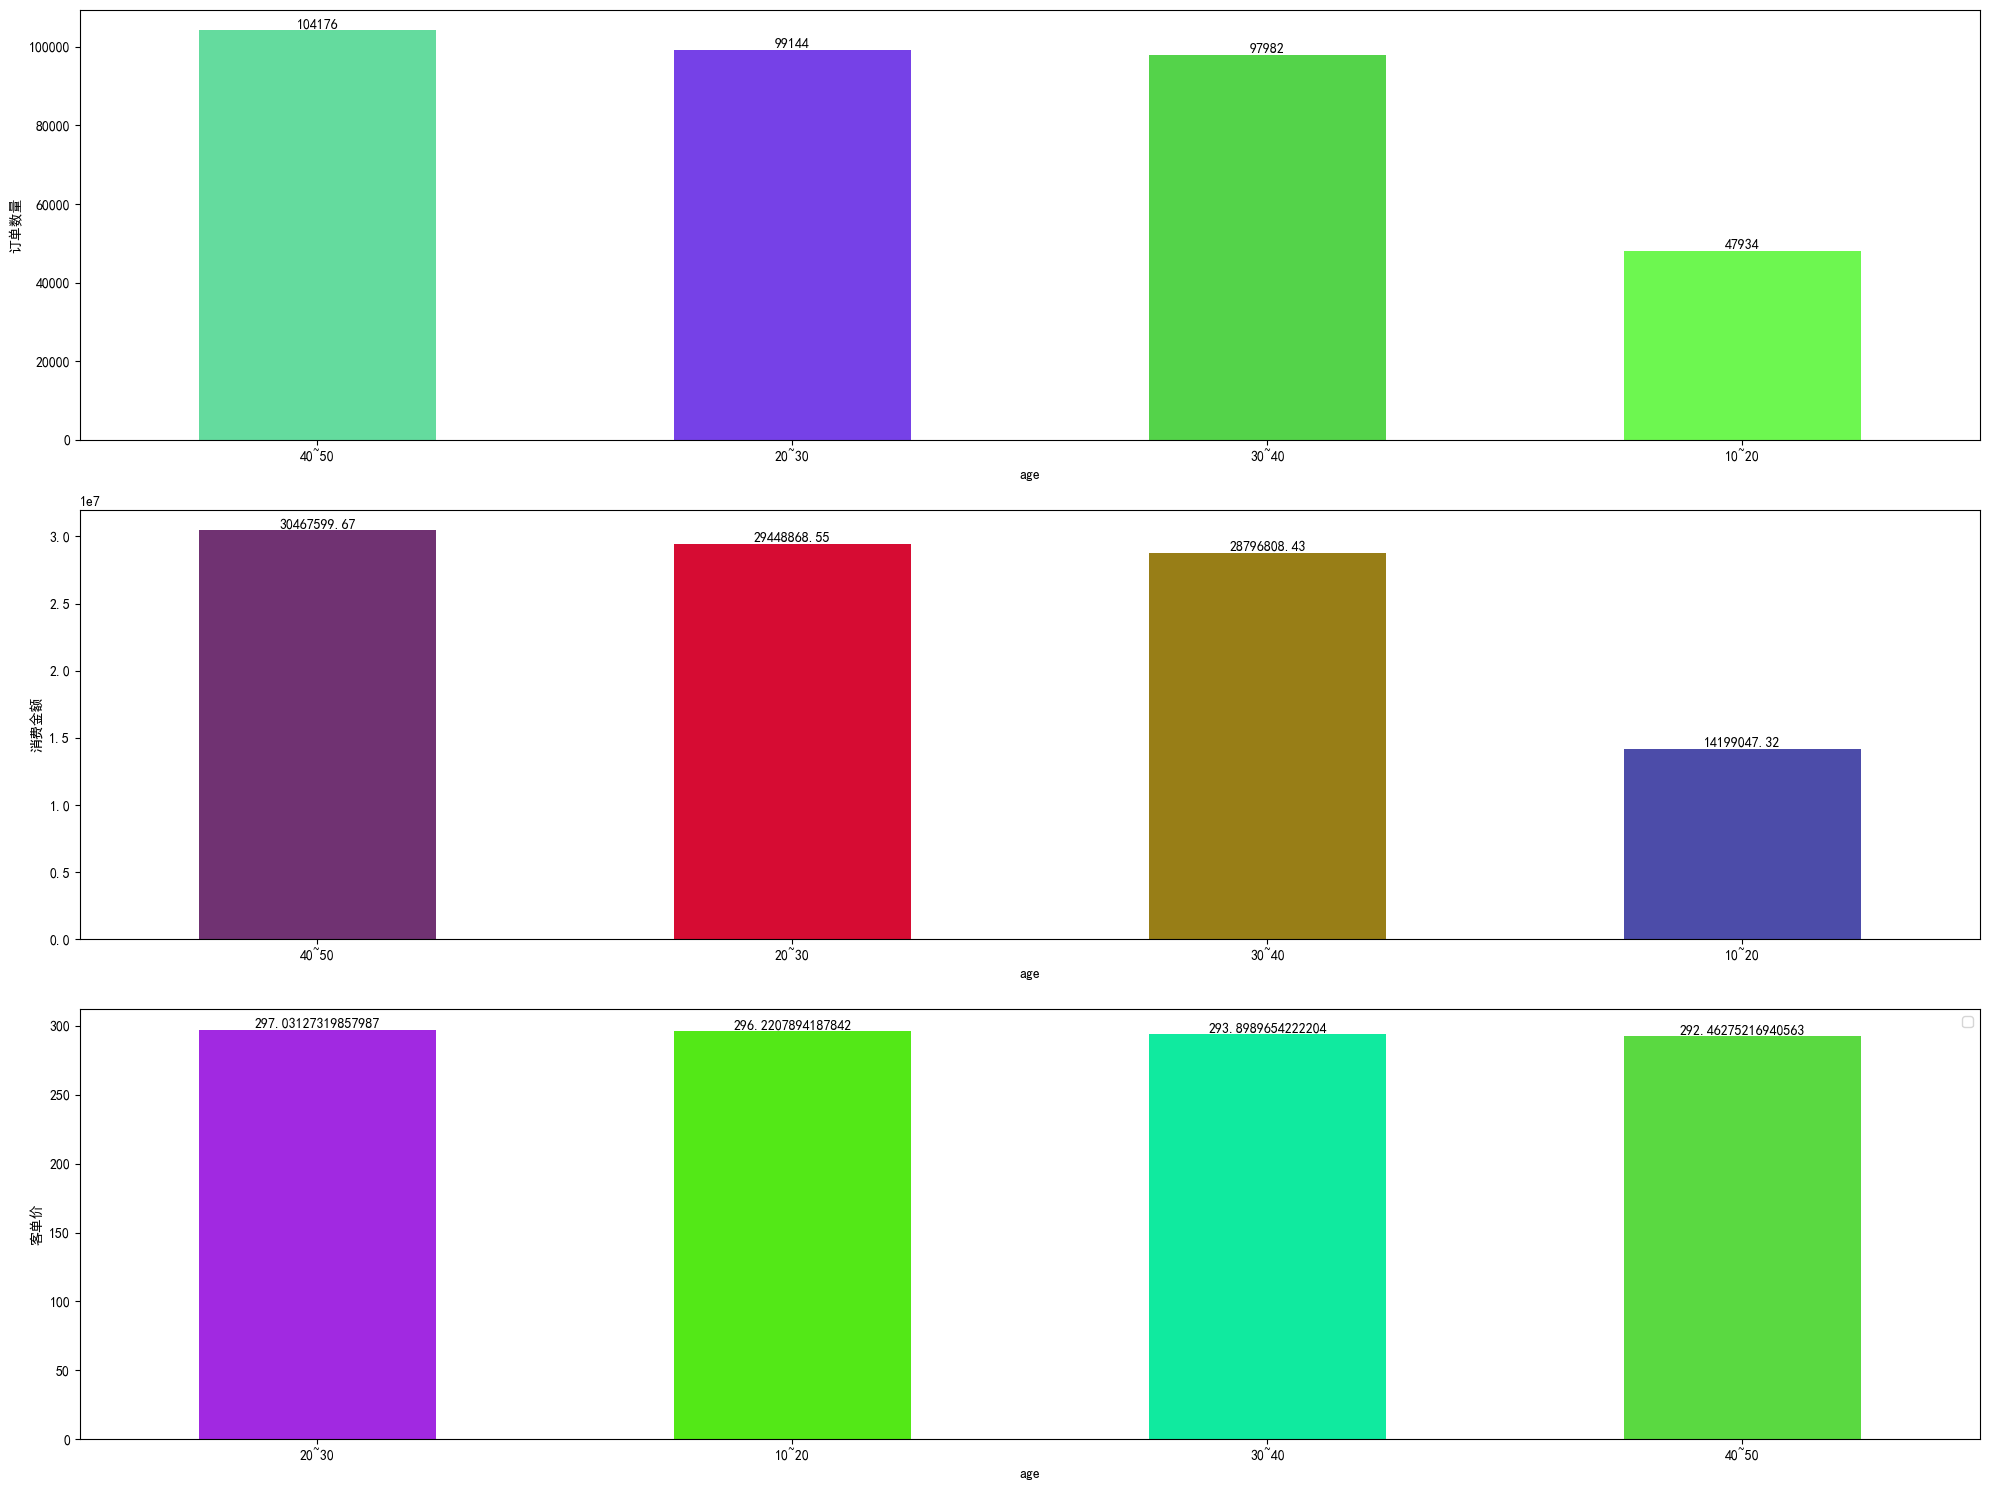

In [17]:
f(data,x='age',x_text='年龄')

由图像可以看出，超过50%的用户年龄分布在20-40之间,订单数量和销售额也超过了50%，而且客单价也有十分不错的表现，没有50-60的人，可能是因为这部分群体年龄较大，不会购物或者对电子产品不感兴趣
通过图表可知，10-20的人虽然消费金额少，但是客单价却是最高的，说明用户更喜欢价格高的，可以对年轻人推荐高端产品，中年人推荐较为便宜的

C:\Users\21369\AppData\Local\Temp\ipykernel_4544\4217753806.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


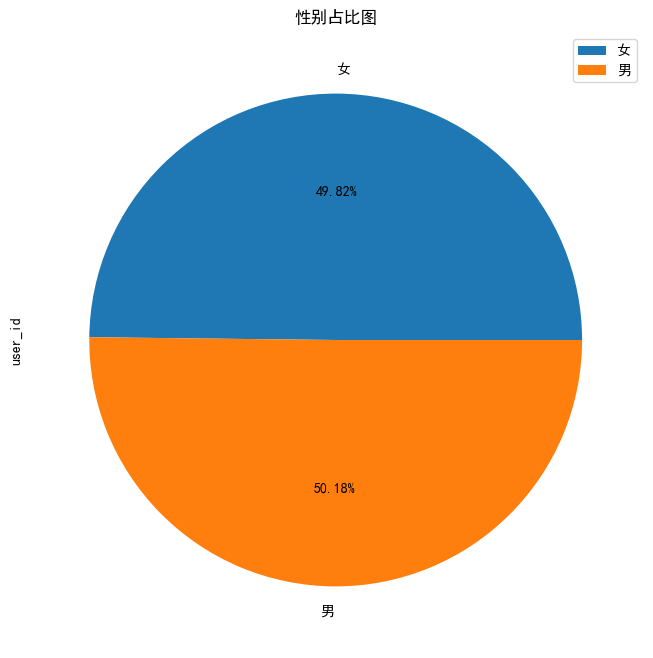

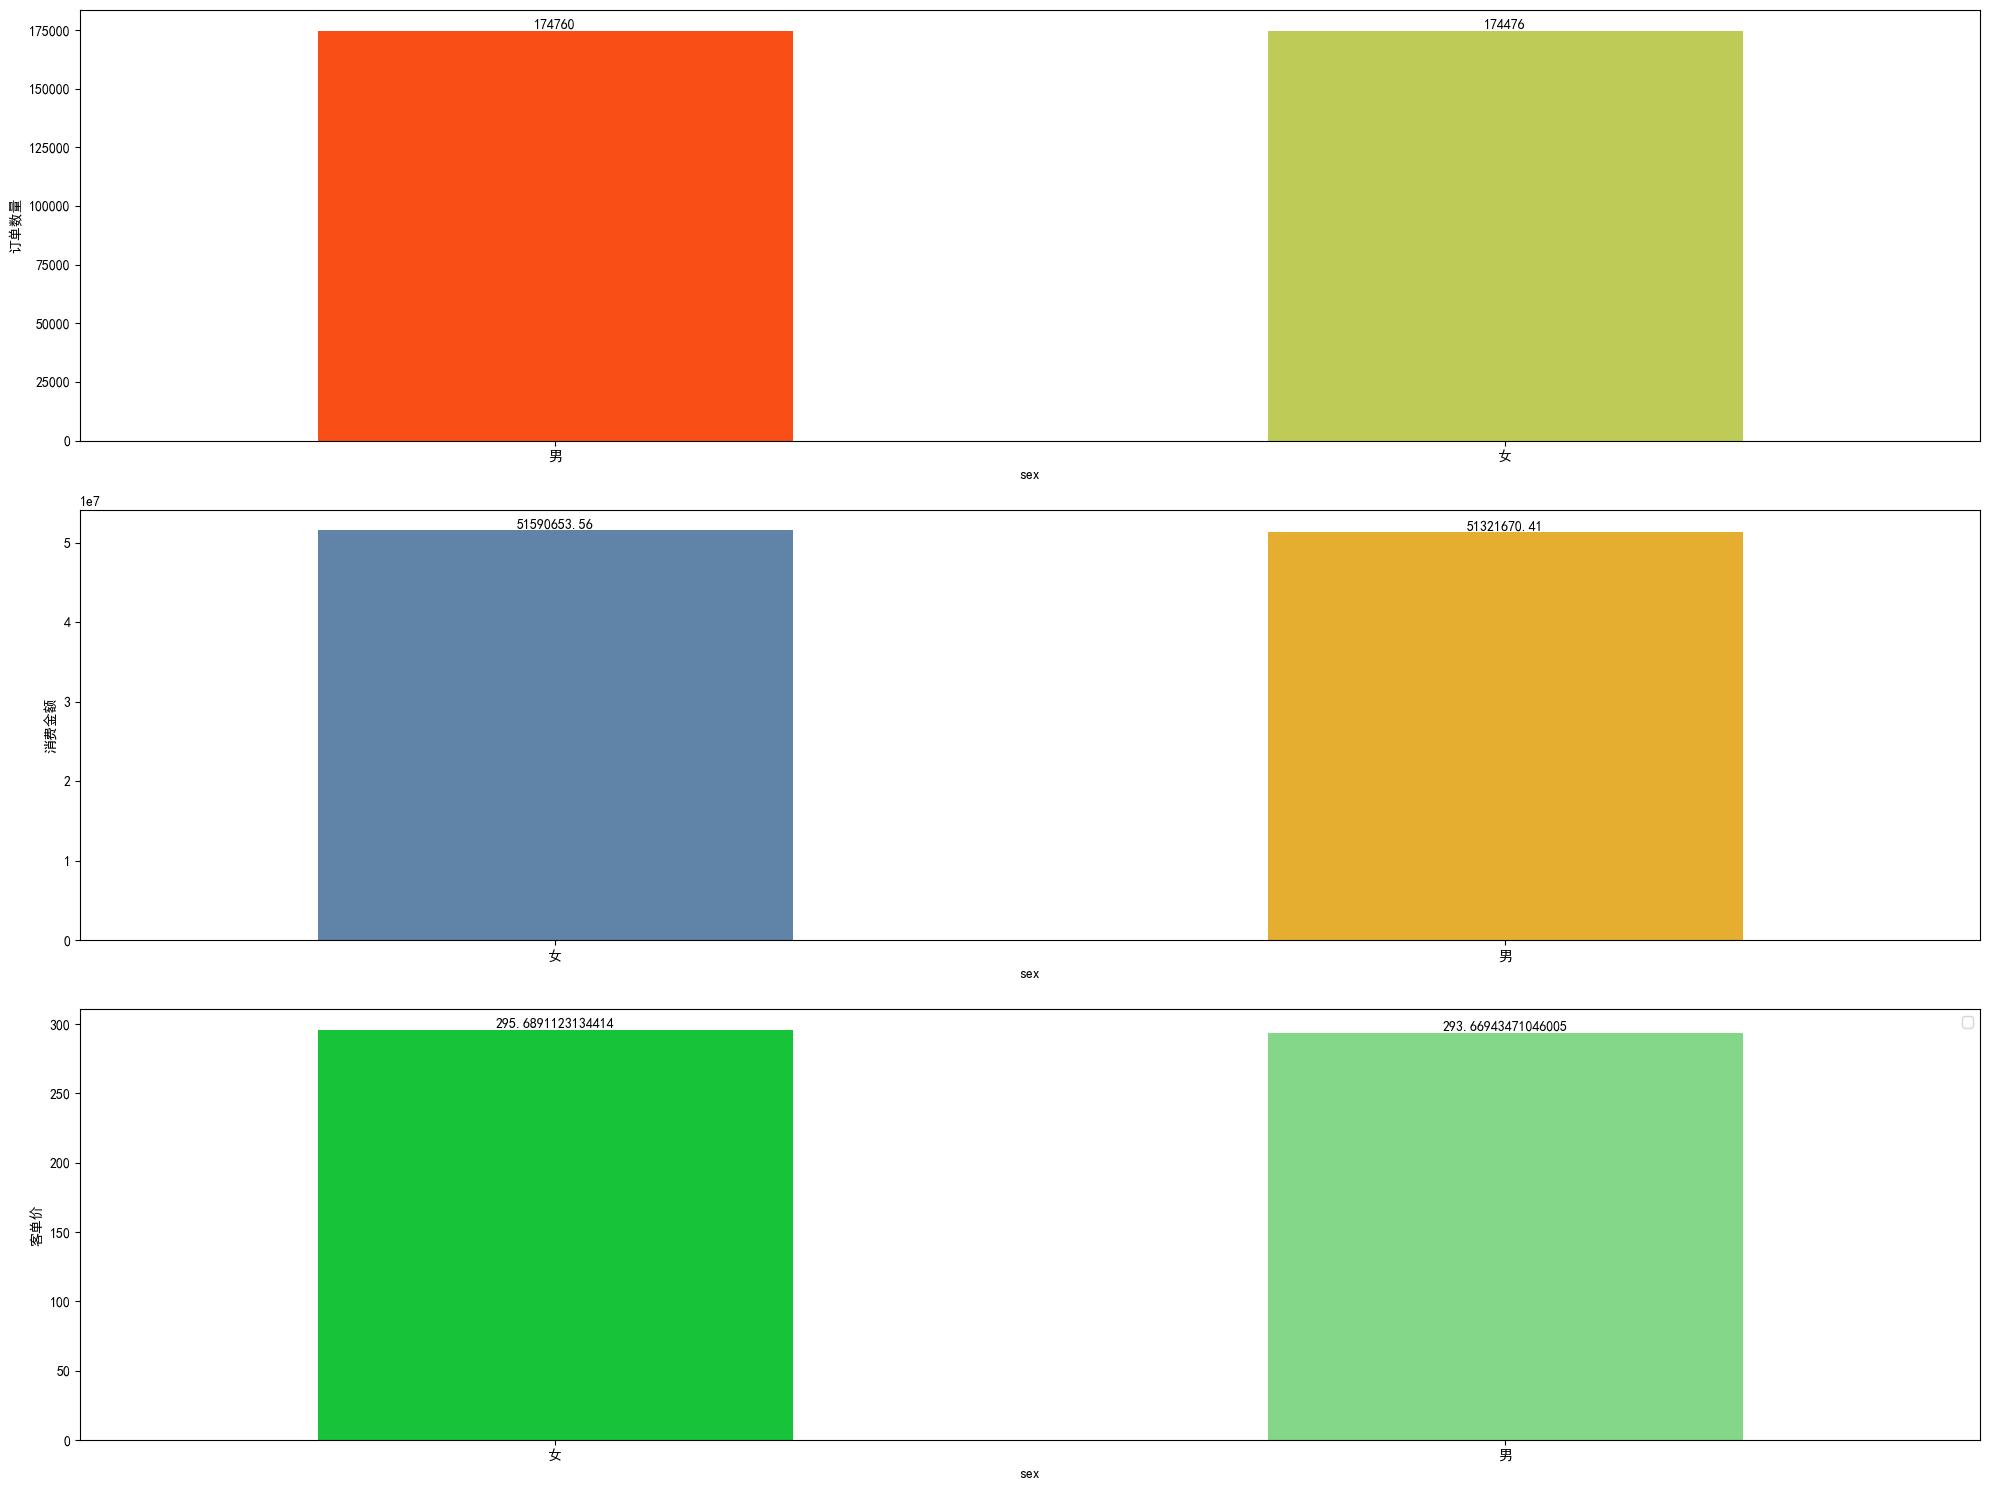

In [18]:
f(data,x='sex',x_text='性别')

由性别可以看出 男女区别几乎没有 对此可以不用下功夫

C:\Users\21369\AppData\Local\Temp\ipykernel_4544\4217753806.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


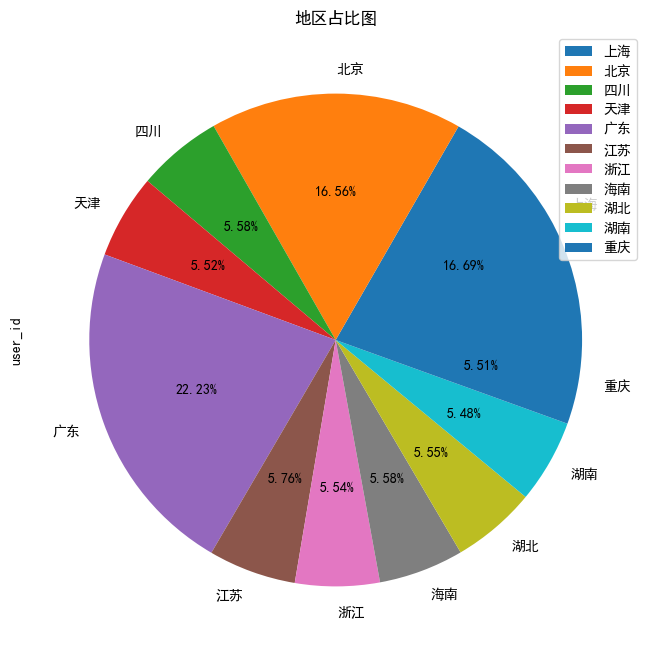

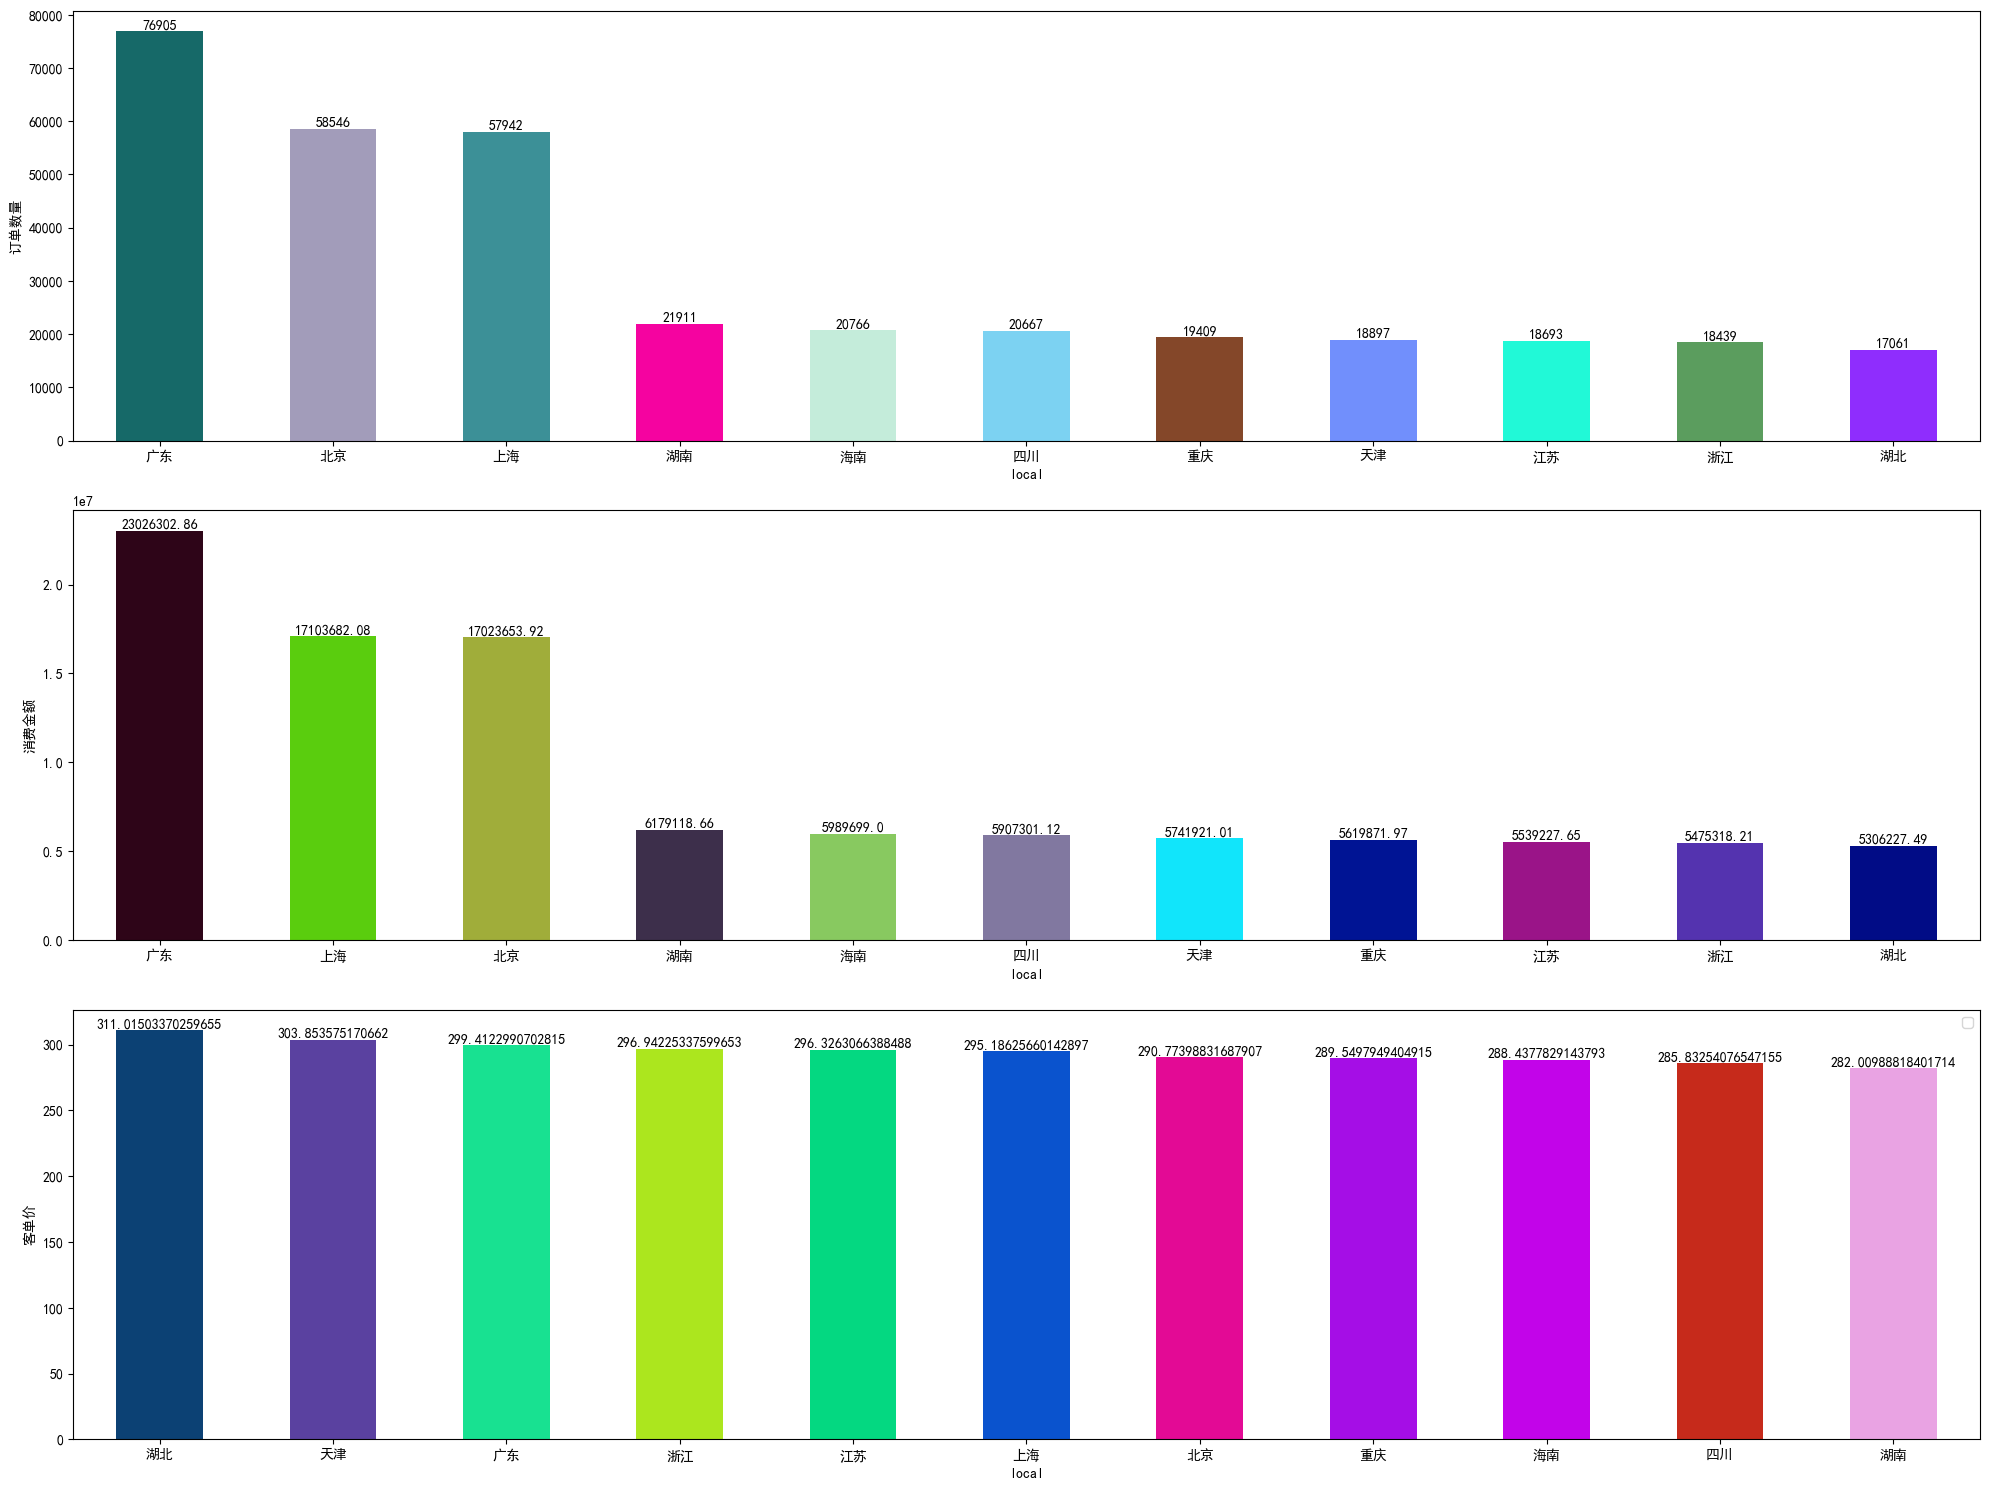

In [19]:
f(data,x='local',x_text='地区')

In [20]:
# 由数据可以看出 超过50%的用户集中在北京，上海和广东，其中广东占比最大
# 电子产品的消费金额集中在广东，北京，上海，天津等8个城市，80%的消费金额集中在70%的省市中，其中
# 25%的省市占据了50%的消费金额，说明北上广是集中消费地,我们要大力发展这些地方
# 客单价然是湖北，天津，广东，说明湖北，天津的用户在电子产品方面还是具备较好的购买力，只是消费的不多，对此可以多投注一下成本

从商品角度去分析

In [21]:
data.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,year,quarter,month,weekday,hour
0,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2268105426648171300,electronics.tablet,samsung,162.01,1515915625441994000,20~30,女,海南,2020,2,4,星期五,11
1,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2268105426648171300,electronics.tablet,samsung,162.01,1515915625441994000,20~30,女,海南,2020,2,4,星期五,11
2,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2268105430162997500,electronics.audio.headphone,huawei,77.52,1515915625447879400,30~40,女,北京,2020,2,4,星期五,14
3,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2268105430162997500,electronics.audio.headphone,huawei,77.52,1515915625447879400,30~40,女,北京,2020,2,4,星期五,14
4,2020-04-24 19:16:21+00:00,2294584263154074236,2273948316817424439,2268105471367840000,no_code,karcher,217.57,1515915625443148000,30~40,女,广东,2020,2,4,星期五,19


<Axes: xlabel='brand', ylabel='count'>

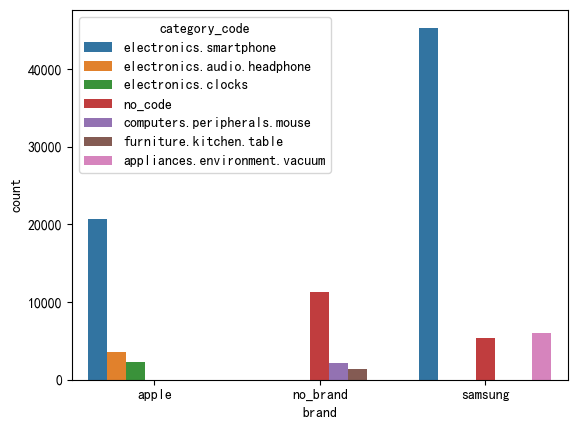

In [22]:
# 最受欢迎的三种品牌
df = data.groupby(['brand','category_code']).size().reset_index(name='count')
df['rn'] = df.groupby('brand')['count'].rank(method='dense',ascending=False)
df2 = data.groupby('brand').size().reset_index(name='count').sort_values('count',ascending=False)
df2 = df2.head(3)['brand']
df = df[(df['brand'].isin(df2)) & (df['rn']<=3)]
df = df.sort_values(['brand','count'],ascending=[True,False])
df= df[['brand','category_code','count']]
sns.barplot(df,x='brand',y='count',hue='category_code')

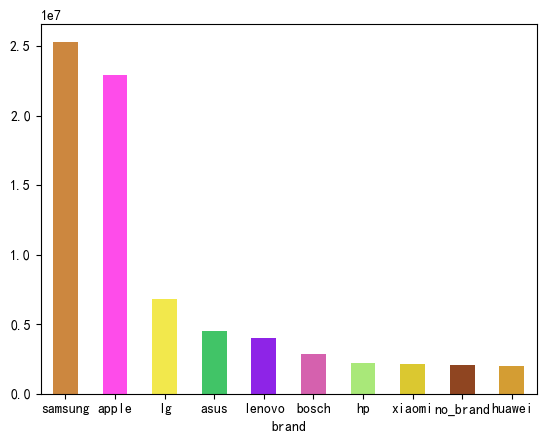

<Figure size 1000x600 with 0 Axes>

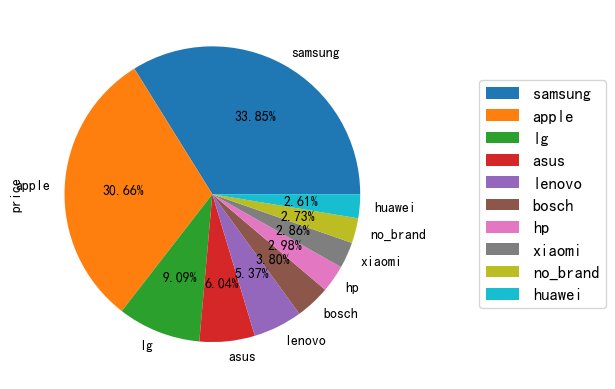

In [23]:
df = data.groupby('brand')['price'].sum().reset_index()
df.sort_values('price',inplace=True,ascending=False)
df= df.iloc[0:10]

df.plot(x='brand',y='price',kind='bar',color = random_color(len(df)),rot=0)
# 移除图例
plt.legend().remove()
plt.show()
plt.figure(figsize=(10,6))
df.plot(labels=df['brand'],y='price',kind='pie',color = random_color(len(df)),rot=0,autopct='%.2f%%')
# 把图例放到右侧
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5), fontsize=12)

由图表可以看出 三星 苹果 lg 是最受欢迎的，他们三个占比超过了70% 我们可以给用户推荐这三个品牌 购买率会更高

C:\Users\21369\AppData\Local\Temp\ipykernel_4544\393782609.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = data.groupby(['age','brand'])['order_id'].count().reset_index()
C:\Users\21369\AppData\Local\Temp\ipykernel_4544\393782609.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['rn'] = df.groupby(['age'])['order_id'].rank('dense',ascending=False)


<Axes: xlabel='age', ylabel='order_id'>

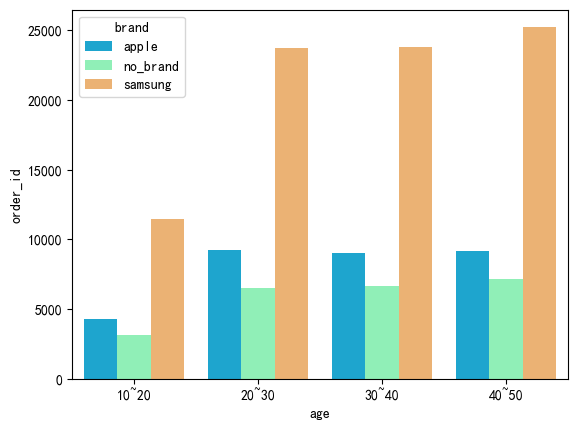

In [24]:
df = data.groupby(['age','brand'])['order_id'].count().reset_index()
df['rn'] = df.groupby(['age'])['order_id'].rank('dense',ascending=False)
df= df[df['rn']<=3]
sns.barplot(df,x='age',y='order_id',hue='brand',palette='rainbow')

由这个表可以看出 无论哪个年龄段的人都喜欢购买apple samsung两大品牌 可以无脑推荐给用户

用户复购率分析

In [25]:
df = data['user_id'].value_counts().reset_index()
rate = len(df[df['count']>1]) / len(df['count'])
print(f'复购率为:{rate}')

复购率为:0.6156591992480361


复购率为0.62 可以看出是非常不错的

In [26]:
df = data.groupby(['user_id','sex']).size().reset_index(name='count')
df = df.groupby('sex').agg(
    rate = ('count',lambda x:x[x>1].count()/x.count())
).reset_index()
df

,sex,rate
0,女,0.614101
1,男,0.617206


,local,rate
0,上海,0.611744
1,北京,0.613165
2,四川,0.613071
3,天津,0.625886
4,广东,0.619211
5,江苏,0.618779
6,浙江,0.616472
7,海南,0.619735
8,湖北,0.617030
9,湖南,0.617695


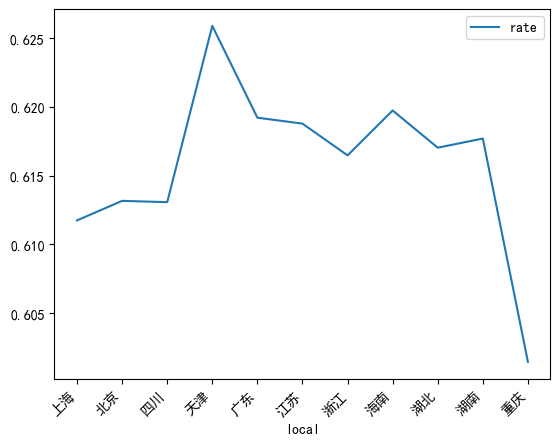

In [27]:
df = data.groupby(['user_id','local']).size().reset_index(name='count')
df = df.groupby(['local']).agg(
    rate = ('count',lambda x:x[x>1].count()/x.count())
).reset_index()
df.plot(x='local',y='rate')
plt.xticks(
    ticks=range(len(df['local'])), 
    labels=df['local'],          
    rotation=45,                                  
    ha='right'                                      
)
df

天津地区的复购率最高，重庆最低,因为重庆的gdp偏低 可以多给重庆地区的发送优惠券，可以提高重庆的rate

# 时间维度分析

<Axes: xlabel='month'>

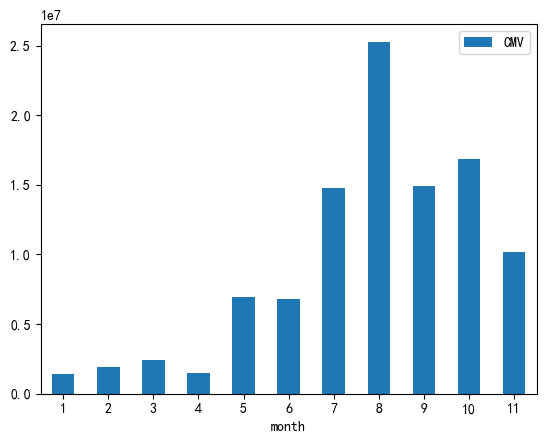

In [28]:
df = data.groupby('month')['price'].sum().reset_index(name='CMV')
df.plot(x='month',y='CMV',kind='bar',rot=0)

从消费角度来看 建议在第3季度加大电子产品的市场投入和营销推广力度，其中，更应该加强对8月份的推广力度
在销售淡季1,2季度，可以在5月份加强电子产品的营销力度和市场投入

<Axes: xlabel='hour'>

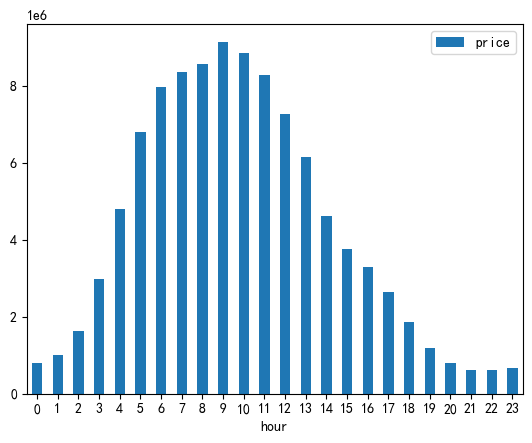

In [29]:
df= data.groupby('hour')['price'].sum().reset_index()
df.plot(x='hour',y='price',kind='bar',rot=0)

每天的9-10点是用户集中消费时间，可以在每天9点左右推出限时优惠活动，刺激用户消费

<Axes: xlabel='weekday'>

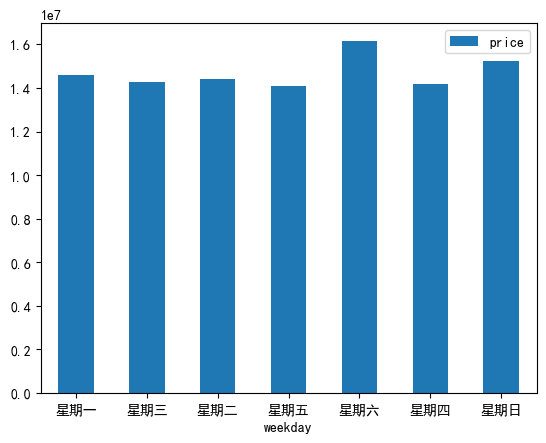

In [30]:
df= data.groupby('weekday')['price'].sum().reset_index()
df.plot(x='weekday',y='price',kind='bar',rot=0)

周六是一周中的用户集中消费时间 建议在周六前一天加大广告投入和营销力度，或推出更多的优惠活动，进一步促销电子产品的销售

# 复购周期

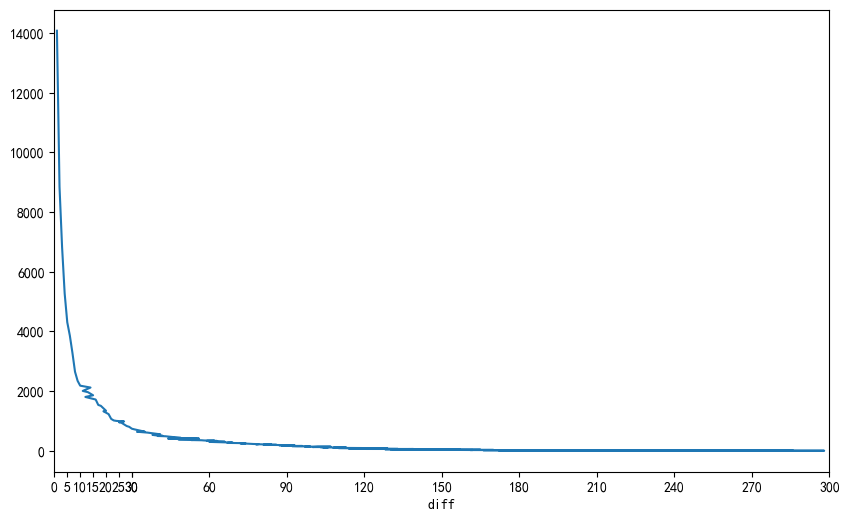

In [31]:
df= data[['user_id','event_time']]
df =df.sort_values(['user_id','event_time'])
df['diff'] = df.groupby('user_id')['event_time'].diff().dt.days
df.dropna(inplace=True)
df = df['diff'].value_counts()
df = df[df.index>0]
plt.figure(figsize=(10,6))
df.plot()
xticks = list(range(0, 31, 5)) + list(range(30, 301, 30))
plt.xticks(xticks)
# 设置 x 轴范围，让图更聚焦
plt.xlim(0, 300)
plt.show()

由图表可以看出 大部分用户的复购时间在五天以内 所以我们要在用户购买电子产品的五天之内，添加限时（5天）优惠价，刺激用户进行消费，提升cmv

# RFM模型

<Axes: ylabel='Type'>

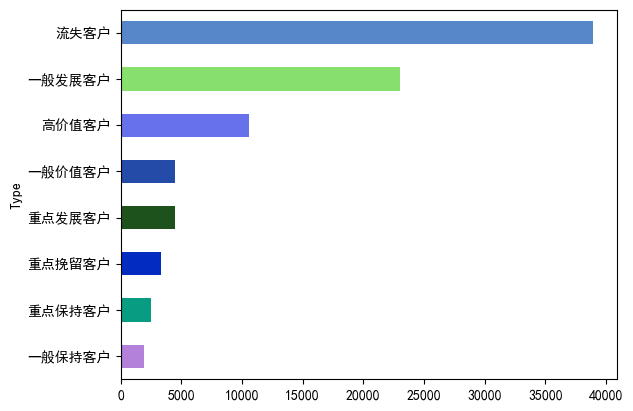

In [32]:
# r 最近一次的消费时间
# f 消费频率
# m  消费金额
df = data.copy()
df['event_time'] = df['event_time'].dt.date
df['间隔天数'] = (pd.to_datetime('2021-01-01') - pd.to_datetime(df['event_time'])).dt.days
R = df.groupby('user_id')['间隔天数'].min().reset_index()
R
F = df.groupby('user_id')['order_id'].nunique().reset_index(name='消费频率')
F
M = df.groupby('user_id')['price'].sum().reset_index(name='消费金额')
M
df2 = R.merge(F,how='left',on='user_id')
df3 = df2.merge(M,how='left',on='user_id')
df3.loc[df3['间隔天数']>=df3['间隔天数'].mean(),['R_S']] = 1
df3.loc[df3['间隔天数']<df3['间隔天数'].mean(),['R_S']] = 2  # 为2更好
df3.loc[df3['消费频率']<df3['消费频率'].mean(),['F_S']] = 1  
df3.loc[df3['消费频率'] >= df3['消费频率'].mean(),['F_S']] = 2 # 为2更好
df3.loc[df3['消费金额']<df3['消费金额'].mean(),['M_S']] = 1  
df3.loc[df3['消费金额'] >= df3['消费金额'].mean(),['M_S']] = 2 # 为2更好
df3['RFM'] = df3['R_S']*100 + df3['F_S']*10 + df3['M_S']*1 
df3
CustomerType = pd.DataFrame(data={'RFM': [111,112,121,122,211,212,221,222],
                                  'Type': ['流失客户','重点挽留客户','一般保持客户','重点保持客户',
                                           '一般发展客户','重点发展客户','一般价值客户','高价值客户'] } )
RFM_Data = df3.merge(CustomerType)
RFM_Data.head()
df4 = RFM_Data['Type'].value_counts().sort_values()
df4.plot(kind='barh',color = random_color(len(df4)))

<Axes: >

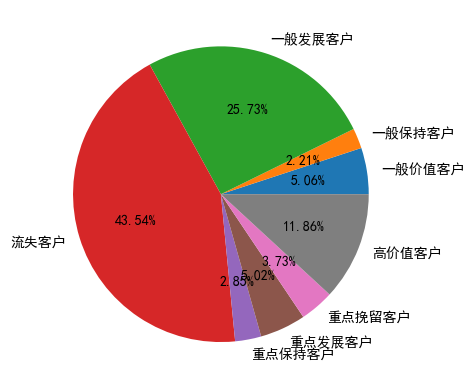

In [33]:
df5 = RFM_Data[['user_id','Type']]
df = df.merge(df5,how='inner',on='user_id')
df6 = RFM_Data.groupby('Type').size()
df6.plot(kind='pie',autopct='%.2f%%')

流失客户占比超过了40%，针对流失客户 我们需要加大优惠力度 进行市场调研等等，争取变成一般忠诚客户
高价值客户 我们提供VIP服务，保持住高价值客户

<Axes: >

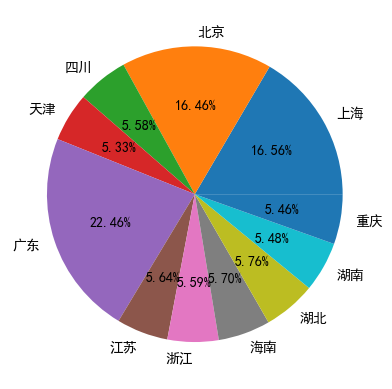

In [34]:
df7 = df[df['Type']=='流失客户'].groupby('local').size()
# df7.plot(kind='bar',rot=0)
df7.plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='price'>

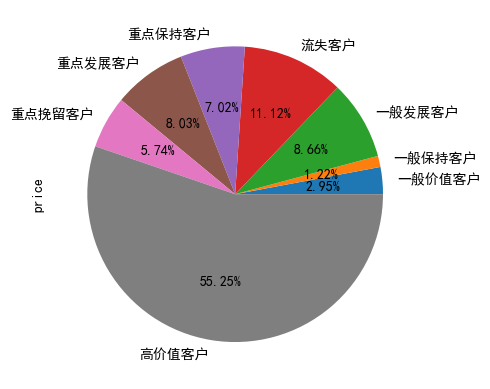

In [35]:
df6 = df.groupby('Type')['price'].sum()
df6.plot(kind='pie',autopct='%.2f%%')

由上面两个图表可以得出结论，高价值客户虽然只占了人数的10%，可是消费金额占比却超过了50%，由此可见，我们需要认真这些高价值客户
我们还可以把重点发展客户这些用户提供良好的服务，争取把他们变成高价值客户“